<a href="https://colab.research.google.com/github/Eribakova/R/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Improve Your Analytics Projects w/ These Data Distributions Visualizations


### University of Virginia
### CS 5010: Programming and Systems for Data Science
### Last Updated: March 15, 2021
---  


### SOURCES 


https://github.com/kevinclee26/credit_card_churn




### OBJECTIVES

In this exercise, we’ll look at the most popular charts used to express data distributions. We’re primarily focused on univariate data but will have the opportunity to perform comparisons across subsets based on a second variable.



In [ ]:
# Import Dependenciesimport pandas as pd
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as sts
# Import Data
df=pd.read_csv('https://raw.githubusercontent.com/kevinclee26/credit_card_churn/main/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
drop_columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df['Total_Relationship_Cnt']=df['Total_Relationship_Count'].map(lambda x: 'More than 3' if x>3 else ('3' if x==3 else '2 or less'))
df['Total_Ct_Chng_Q4_Q1_bin']=pd.cut(df['Total_Ct_Chng_Q4_Q1'], bins=10)
income_map={
    'Unknown': '6. Unknown', 
    'Less than $40K': '5. Less than $40K', 
    '$40K - $60K': '4. $40K - $60K',
    '$60K - $80K': '3. $60K - $80K', 
    '$80K - $120K': '2. $80K - $120K',
    '$120K +': '1. $120K +'}
df['Income_Category']=df['Income_Category'].map(income_map)
df['Customer_Age_bin']=pd.cut(df['Customer_Age'], bins=[df['Customer_Age'].min() + i*6 for i in range(9)], include_lowest=True)
df['Months_on_book_bin']=pd.cut(df['Months_on_book'], bins=10)
df=df.drop(drop_columns, axis=1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Relationship_Cnt,Total_Ct_Chng_Q4_Q1_bin,Customer_Age_bin,Months_on_book_bin
0,768805383,Existing Customer,45,M,3,High School,Married,3. $60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,More than 3,"(1.486, 1.857]","(44.0, 50.0]","(38.8, 43.1]"
1,818770008,Existing Customer,49,F,5,Graduate,Single,5. Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,More than 3,"(3.343, 3.714]","(44.0, 50.0]","(43.1, 47.4]"
2,713982108,Existing Customer,51,M,3,Graduate,Married,2. $80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,More than 3,"(2.228, 2.6]","(50.0, 56.0]","(34.5, 38.8]"
3,769911858,Existing Customer,40,F,4,High School,Unknown,5. Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,3,"(2.228, 2.6]","(38.0, 44.0]","(30.2, 34.5]"
4,709106358,Existing Customer,40,M,3,Uneducated,Married,3. $60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,More than 3,"(2.228, 2.6]","(38.0, 44.0]","(17.3, 21.6]"


# Heatmap

In [ ]:
df[['Customer_Age_bin', 'Gender']].pivot_table(index='Customer_Age_bin', columns='Gender', aggfunc='size').style.background_gradient()

Gender,F,M
Customer_Age_bin,,
"(25.999, 32.0]",216,246
"(32.0, 38.0]",653,588
"(38.0, 44.0]",1307,1165
"(44.0, 50.0]",1523,1351
"(50.0, 56.0]",1092,917
"(56.0, 62.0]",457,393
"(62.0, 68.0]",110,107
"(68.0, 74.0]",0,2


In [ ]:
income_cols={x: x.split()[-1] for x in sorted(income_map.values())}
# display(income_cols)
attrited_df=df[df['Attrition_Flag']=='Attrited Customer']
summary_df=attrited_df[['Customer_Age_bin', 'Income_Category']].pivot_table(index='Customer_Age_bin', columns='Income_Category', aggfunc='size').rename(columns=income_cols)#.applymap(lambda x: '{:,.2f}%'.format(x*100))
summary_df.style.background_gradient()
# summary_df

Income_Category,+,$120K,$80K,$60K,$40K,Unknown
Customer_Age_bin,,,,,,
"(25.999, 32.0]",3,1,8,10,33,7
"(32.0, 38.0]",13,21,17,30,68,19
"(38.0, 44.0]",23,60,63,84,155,34
"(44.0, 50.0]",37,85,49,76,163,62
"(50.0, 56.0]",36,56,28,44,132,42
"(56.0, 62.0]",14,19,20,26,47,18
"(62.0, 68.0]",0,0,4,1,14,5
"(68.0, 74.0]",0,0,0,0,0,0


In [ ]:
income_cols={x: x.split()[-1] for x in sorted(income_map.values())}
# display(income_cols)
existing_df=df[df['Attrition_Flag']=='Existing Customer']
existing_df[['Customer_Age_bin', 'Income_Category']].pivot_table(index='Customer_Age_bin', columns='Income_Category', aggfunc='size').rename(columns=income_cols).style.background_gradient()

Income_Category,+,$120K,$80K,$60K,$40K,Unknown
Customer_Age_bin,,,,,,
"(25.999, 32.0]",6,24,42,84,178,66
"(32.0, 38.0]",62,170,160,202,364,115
"(38.0, 44.0]",127,331,324,366,699,206
"(44.0, 50.0]",167,374,374,426,794,267
"(50.0, 56.0]",199,306,205,241,556,164
"(56.0, 62.0]",40,83,97,151,260,75
"(62.0, 68.0]",0,5,11,48,97,32
"(68.0, 74.0]",0,0,0,1,1,0


# Bar Chart

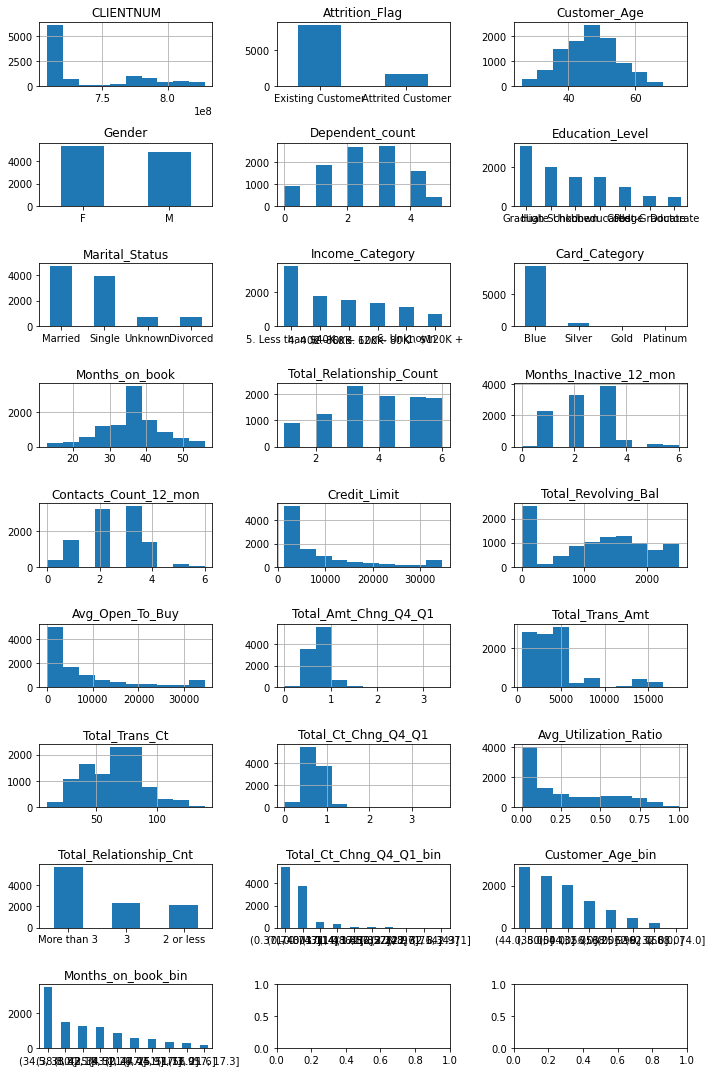

In [ ]:
feature_list=list(df.columns)
ncolumns=3
fig, ax=plt.subplots(math.ceil(len(feature_list)/ncolumns), ncolumns, figsize=(10, 15))
for idx, each_feature in enumerate(feature_list): 
    if df[each_feature].dtype.kind in 'biufc': 
        df[each_feature].hist(ax=ax[math.floor(idx/ncolumns)][idx%ncolumns])
        ax[math.floor(idx/ncolumns)][idx%ncolumns].set_title(each_feature)
    else: 
        df[each_feature].value_counts().plot(kind='bar', ax=ax[math.floor(idx/ncolumns)][idx%ncolumns], rot=0)
        ax[math.floor(idx/ncolumns)][idx%ncolumns].set_title(each_feature)
plt.tight_layout()

# scatter

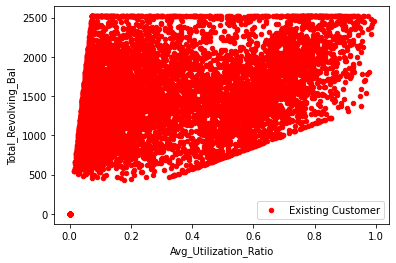

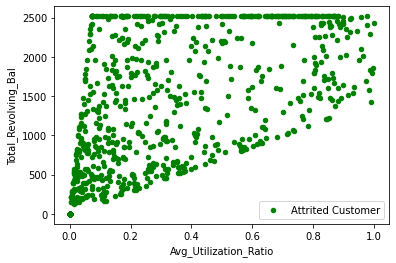

In [ ]:
colors=['red', 'green']
for idx, each_flag in enumerate(df['Attrition_Flag'].unique()): 
    data=df[df['Attrition_Flag']==each_flag]
    data[['Avg_Utilization_Ratio', 'Attrition_Flag', 'Total_Revolving_Bal']].plot(kind='scatter', x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', label=each_flag, c=colors[idx])

# Pie Charts

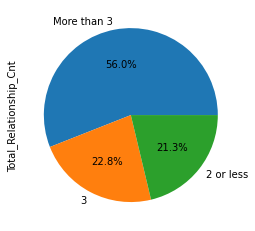

In [ ]:
df['Total_Relationship_Cnt'].value_counts().plot(kind='pie', autopct='%1.1f%%')

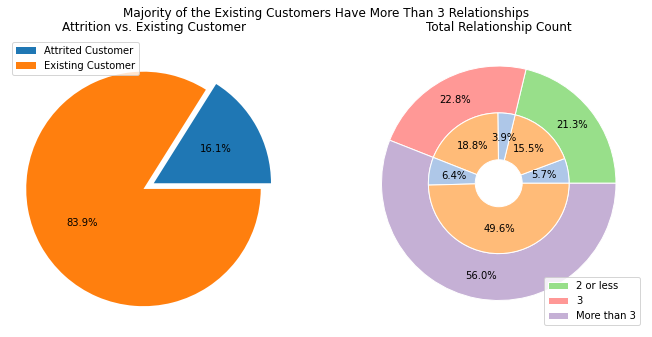

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
size=.4
cmap = plt.get_cmap("tab20")

vals=df.pivot_table(columns='Total_Relationship_Cnt', index='Attrition_Flag', aggfunc='size')#.to_numpy()
outer_colors = cmap(np.arange(2)*2)
outer_labels=vals.index
ax[0].pie(vals.sum(axis=1), radius=1, colors=outer_colors, autopct='%1.1f%%', explode=[0, 0.1])
ax[0].legend(outer_labels, loc='upper left')
ax[0].set_title('Attrition vs. Existing Customer')
vals=df.pivot_table(columns='Attrition_Flag', index='Total_Relationship_Cnt', aggfunc='size')#.to_numpy()
outer_colors = cmap(np.array([5, 7, 9]))
inner_colors = cmap(np.array([1, 3, 1, 3, 1, 3]))
outer_labels=vals.index
handles, texts, annots=ax[1].pie(vals.sum(axis=1), radius=1, colors=outer_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=0.8)
ax[1].pie(vals.values.flatten(), radius=1-size, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=.65)
ax[1].set_title('Total Relationship Count')
ax[1].legend(handles, outer_labels, loc='lower right')
fig.suptitle('Majority of the Existing Customers Have More Than 3 Relationships')
plt.tight_layout(pad=3)

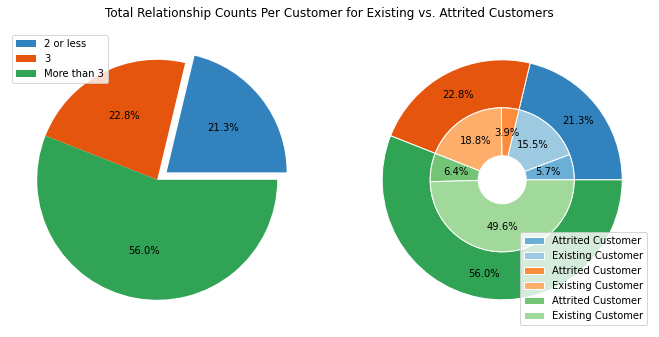

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
size=.4
cmap = plt.get_cmap("tab20c")

vals=df.pivot_table(columns='Attrition_Flag', index='Total_Relationship_Cnt', aggfunc='size')#.to_numpy()
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
outer_labels=vals.index
inner_labels=list(vals.columns)*3
ax[0].pie(vals.sum(axis=1), radius=1, colors=outer_colors, autopct='%1.1f%%', explode=[0.1, 0, 0])
ax[0].legend(outer_labels, loc='upper left')

ax[1].pie(vals.sum(axis=1), radius=1, colors=outer_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=0.8)
handles, texts, annots=ax[1].pie(vals.values.flatten(), radius=1-size, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=.65)
ax[1].legend(handles, inner_labels, loc='lower right')
fig.suptitle('Total Relationship Counts Per Customer for Existing vs. Attrited Customers')
plt.tight_layout(pad=3)
plt.show()

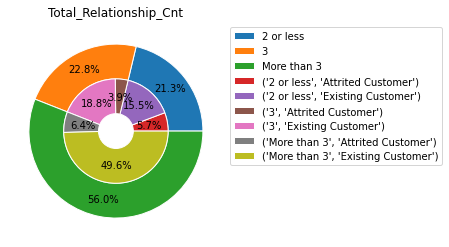

In [ ]:
def plot_nested_pie(data, outer_col, inner_col): 
    size=.4
    wedgeprops={'width': size, 'edgecolor':'w'}
    plot_df=data.pivot_table(columns=inner_col, index=outer_col, aggfunc='size')
    plt.pie(plot_df.sum(axis=1).values, radius=1,
           wedgeprops=wedgeprops, autopct='%1.1f%%', pctdistance=0.8)
    plt.pie(plot_df.values.flatten(), radius=1-size,
           wedgeprops=wedgeprops, autopct='%1.1f%%', pctdistance=.65)
    labels=list(plot_df.index)+[(idx, col) for idx in plot_df.index for col in plot_df.columns]
    plt.legend(labels, bbox_to_anchor=(1, 1))
    plt.title(outer_col)

inner_col='Attrition_Flag'
outer_col='Total_Relationship_Cnt'
plot_df=df.pivot_table(columns=inner_col, index=outer_col, aggfunc='size')
np.arange(len(plot_df.values.flatten())+len(plot_df.index))[len(plot_df.index):]
list(plot_df.index)+[(idx, col) for idx in plot_df.index for col in plot_df.columns]

plot_nested_pie(df, 'Total_Relationship_Cnt', 'Attrition_Flag')

# Bar Graphs

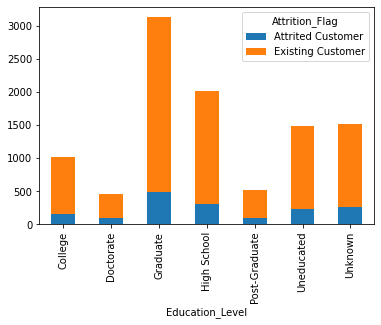

In [ ]:
education_level=df[['Attrition_Flag', 'Education_Level']].groupby(['Education_Level', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True)
# education_level.groupby(['Education_Level']).apply(lambda x: 100*x/x.sum()).unstack().plot(kind='bar', stacked=True)
# education_level/education_level.groupby(['Attrition_Flag']).sum().plot(kind='bar')

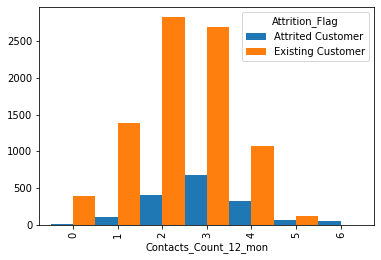

In [ ]:
df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size').plot(kind='bar', width=1)

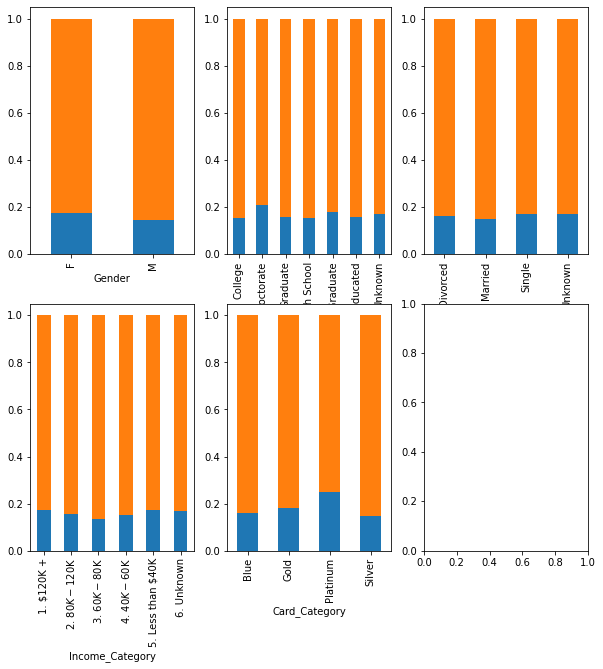

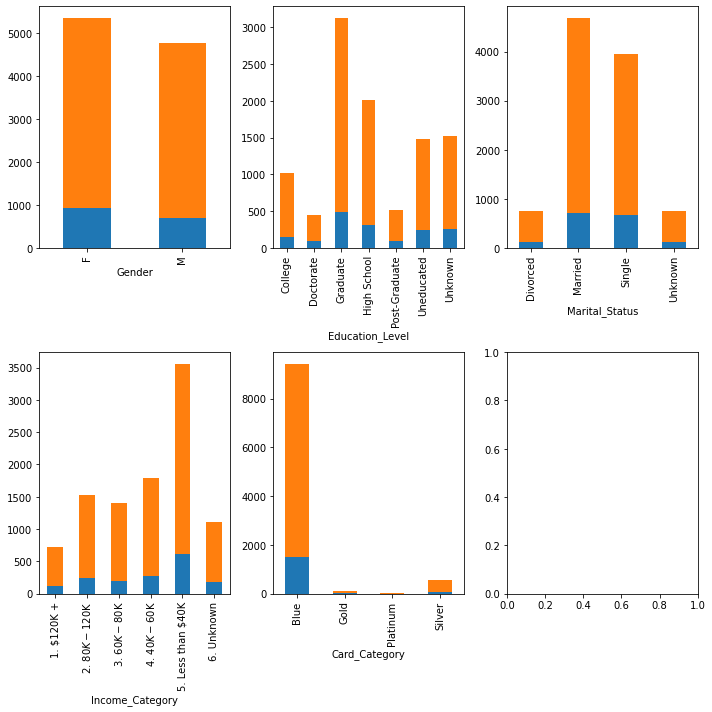

In [ ]:
cat_list=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
ncolumns=3
fig, ax=plt.subplots(math.ceil(len(cat_list)/ncolumns), ncolumns, figsize=(10, 10))
for idx, each_feature in enumerate(cat_list): 
#     df[['Attrition_Flag', 'Gender']].pivot_table(columns='Attrition_Flag', index='Gender', aggfunc='size').plot(kind='bar', stacked=True)
    df[['Attrition_Flag', each_feature]].pivot_table(columns='Attrition_Flag', index=each_feature, aggfunc='size').apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[math.floor(idx/ncolumns)][idx%ncolumns], legend=None)
fig, ax=plt.subplots(math.ceil(len(cat_list)/ncolumns), ncolumns, figsize=(10, 10))
for idx, each_feature in enumerate(cat_list): 
    df[['Attrition_Flag', each_feature]].pivot_table(columns='Attrition_Flag', index=each_feature, aggfunc='size').plot(kind='bar', stacked=True, ax=ax[math.floor(idx/ncolumns)][idx%ncolumns], legend=None)
#     df[['Attrition_Flag', each_feature]].pivot_table(columns='Attrition_Flag', index=each_feature, aggfunc='size').apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[math.floor(idx/ncolumns)][idx%ncolumns], legend=None)
plt.tight_layout()

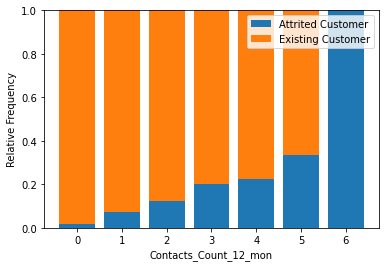

In [ ]:
def plot_stacked_bar_pct(data, outer_col, inner_col): 
    # Plots a percent stacked bar chart of counts of observations based on two categorical columns
    # data is a Pandas.DataFrame
    # outer_col and inner_col are Strings
    plot_df=data[[inner_col, outer_col]].pivot_table(columns=inner_col, index=outer_col, aggfunc='size').apply(lambda x: x/x.sum(), axis=1)
    bottom=np.zeros(len(plot_df.index))
    for each_cat in plot_df.columns: 
        plt.bar(plot_df.index, plot_df[each_cat].values, bottom=bottom, label=each_cat)
        bottom+=plot_df[each_cat].values
    plt.legend()
    plt.xlabel(outer_col)
    plt.ylabel('Relative Frequency')
plot_stacked_bar_pct(df, 'Contacts_Count_12_mon', 'Attrition_Flag')

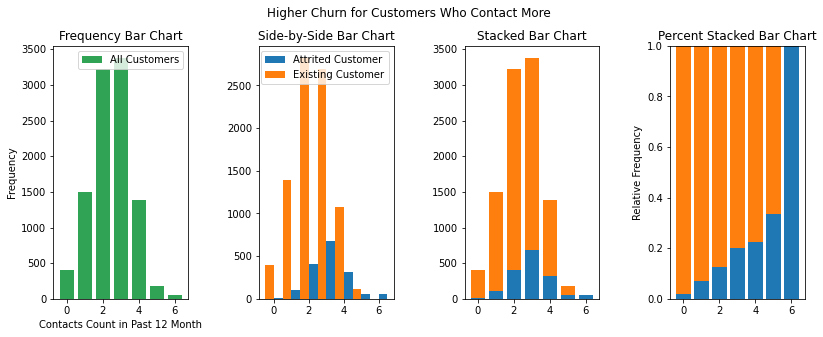

In [ ]:
fig, ax=plt.subplots(1, 4, figsize=(12, 5))
cmap = plt.get_cmap("tab20c")

data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size')
ax[0].bar(data.index, data.sum(axis=1), color=cmap(8), label='All Customers')
ax[0].set_title('Frequency Bar Chart')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Contacts Count in Past 12 Month')
ax[0].legend()
data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size')
width=.5
for idx, each_cat in enumerate(data.columns): 
    ax[1].bar(data.index-(idx*width), data[each_cat].values, width=width, label=each_cat, align='edge')
ax[1].set_title('Side-by-Side Bar Chart')
ax[1].legend()
data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size')
bottom=np.zeros(len(data.index))
for each_cat in data.columns: 
    ax[2].bar(data.index, data[each_cat].values, bottom=bottom, label=each_cat)
    bottom+=data[each_cat].values
ax[2].set_title('Stacked Bar Chart')
ary=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size').apply(lambda x: x/x.sum(), axis=1)
bottom=np.zeros(len(ary.index))
for each_cat in ary.columns: 
    ax[3].bar(ary.index, ary[each_cat].values, bottom=bottom, label=each_cat)
    bottom+=ary[each_cat].values
ax[3].set_ylabel('Relative Frequency')
ax[3].set_title('Percent Stacked Bar Chart')
fig.suptitle('Higher Churn for Customers Who Contact More')
plt.tight_layout(pad=3)
plt.show()

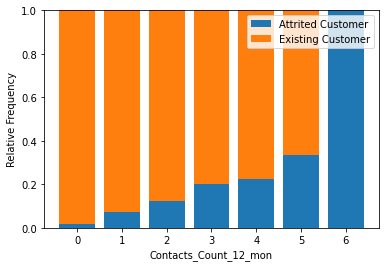

In [ ]:
plot_stacked_bar_pct(df, 'Contacts_Count_12_mon', 'Attrition_Flag')

# Histogram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


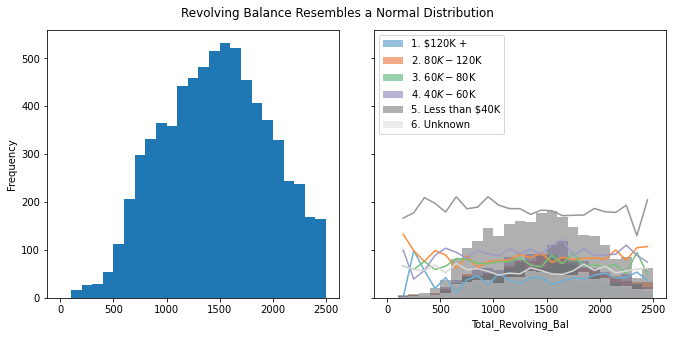

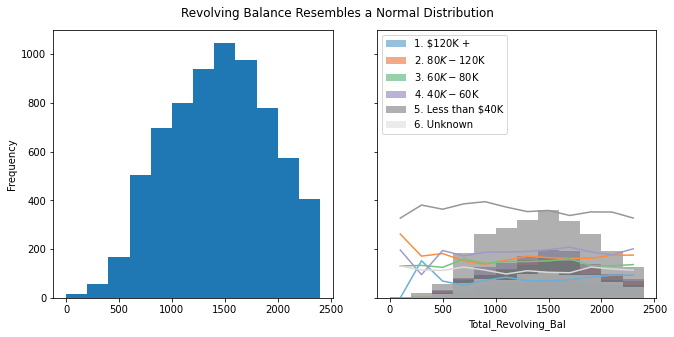

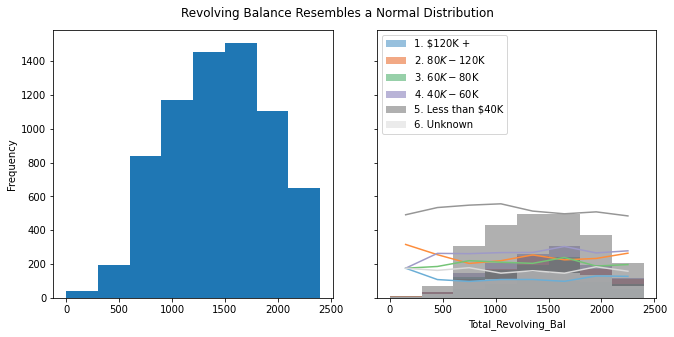

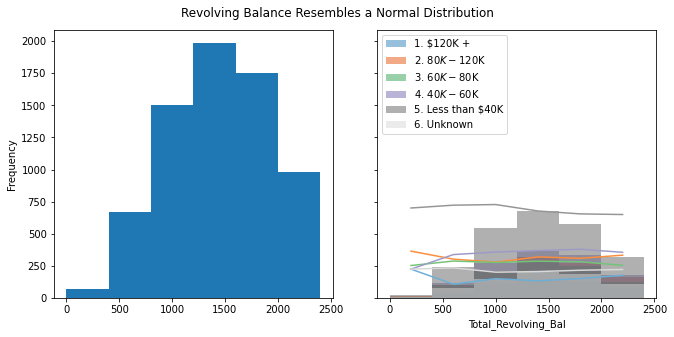

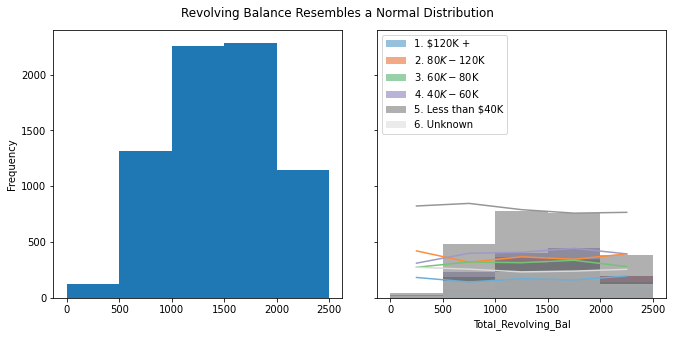

In [ ]:
for i, binwidth in enumerate([100, 200, 300, 400, 500]):
    total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
    cmap = plt.get_cmap("tab20c")
    min_bal=df['Total_Revolving_Bal'].min()
    max_bal=df['Total_Revolving_Bal'].max()
    bar_color=cmap(np.arange(6)*4)
    line_color=cmap(np.arange(6)*4+1)
#     bins=np.arange(min_bal, max_bal, 200)
    bins=np.arange(min_bal, max_bal, binwidth)
    fig, ax=plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
    # colors=['cornflowerblue', 'darkorange']
    total_rev_bal['Total_Revolving_Bal'].plot(kind='hist', ax=ax[0], bins=bins)
    total_count, total_division=np.histogram(total_rev_bal['Total_Revolving_Bal'], bins=bins)
    for idx, (i, g) in enumerate(total_rev_bal.groupby('Income_Category')): 
        ax[1].hist(g['Total_Revolving_Bal'].values, alpha=.5, label=i, bins=bins, color=bar_color[idx]) 
        count, division=np.histogram(g['Total_Revolving_Bal'], bins=bins)
        ax[1].plot((division[:-1]+division[1:])/2, count/total_count*np.max(total_count), color=line_color[idx])
    ax[1].set_xlabel('Total_Revolving_Bal')
    ax[1].legend(loc='upper left')
    fig.suptitle('Revolving Balance Resembles a Normal Distribution')
    fig.tight_layout(pad=3)

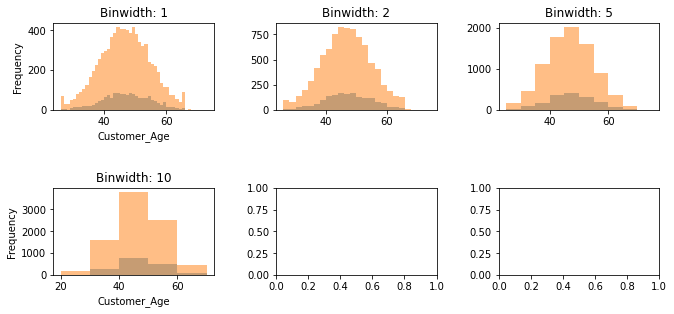

In [ ]:
def experiment_hist_bins(data, outer_col, inner_col, binwidth_candidates): 
    min_amt=data[outer_col].min()
    max_amt=data[outer_col].max()
    ncolumns=3
    fig, ax=plt.subplots(math.ceil(len(binwidth_candidates)/ncolumns), ncolumns, figsize=(10, 5))
    for i, bin_width in enumerate(binwidth_candidates):
        first_bin=min_amt//bin_width*bin_width
        bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
#         bins=np.arange(math.floor(min_amt/bin_width)*bin_width, math.ceil(max_amt/bin_width)*bin_width+1, bin_width)
        if i%ncolumns==0: 
            ax[math.floor(i/ncolumns)][0].set_ylabel('Frequency')
            ax[math.floor(i/ncolumns)][0].set_xlabel(outer_col)
        for idx, (g_name, g) in enumerate(data.groupby(inner_col)): 
            ax[math.floor(i/ncolumns)][i%ncolumns].hist(g[outer_col].values, alpha=.5, label=g_name, bins=bins, stacked=True)
        ax[math.floor(i/ncolumns)][i%ncolumns].set_title(f'Binwidth: {bin_width}')
    fig.tight_layout(pad=3)
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# experiment_hist_bins(df, 'Customer_Age', 'Attrition_Flag', [50, 100, 200, 300, 400, 500])
experiment_hist_bins(df, 'Customer_Age', 'Attrition_Flag', [1, 2, 5, 10])

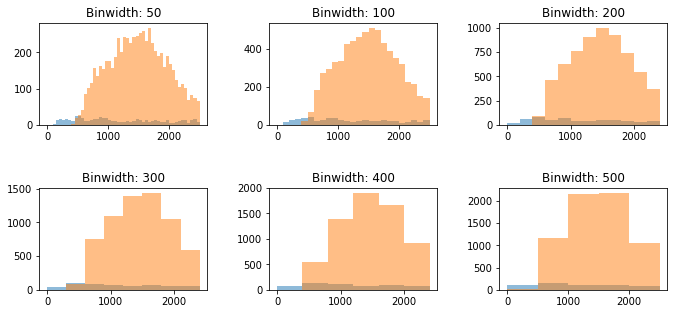

In [ ]:
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
min_bal=df['Total_Revolving_Bal'].min()
max_bal=df['Total_Revolving_Bal'].max()
binwidth_candidates=[50, 100, 200, 300, 400, 500]
ncolumns=3
fig, ax=plt.subplots(math.ceil(len(binwidth_candidates)/ncolumns), ncolumns, figsize=(10, 5))
for i, bin_width in enumerate(binwidth_candidates):
    bins=np.arange(min_bal, max_bal, bin_width)
    for idx, (g_name, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
        ax[math.floor(i/ncolumns)][i%ncolumns].hist(g['Total_Revolving_Bal'].values, alpha=.5, label=g_name, bins=bins)
    ax[math.floor(i/ncolumns)][i%ncolumns].set_title(f'Binwidth: {bin_width}')
    fig.tight_layout(pad=3)

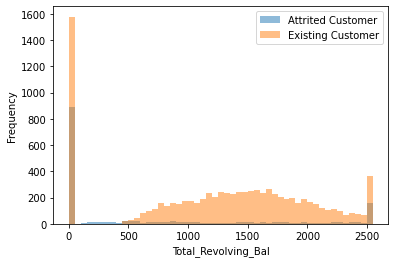

In [ ]:
def plot_overlap_hist(data, outer_col, inner_col, bin_width): 
    min_amt=data[outer_col].min()
    max_amt=data[outer_col].max()
    first_bin=min_amt//bin_width*bin_width
    bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
#     bins=np.arange(min_amt, max_amt, bin_width)
    for idx, (g_name, g) in enumerate(data.groupby(inner_col)): 
        plt.hist(g[outer_col].values, alpha=.5, label=g_name, bins=bins)
    plt.legend()
    plt.xlabel(outer_col)
    plt.ylabel('Frequency')

plot_overlap_hist(df, 'Total_Revolving_Bal', 'Attrition_Flag', 50)

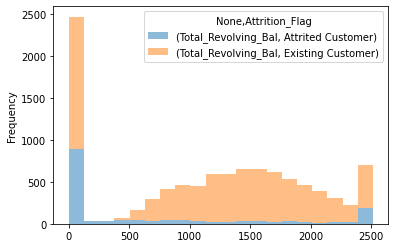

In [ ]:
df[['Total_Revolving_Bal', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='hist', stacked=True, alpha=0.5, bins=20)

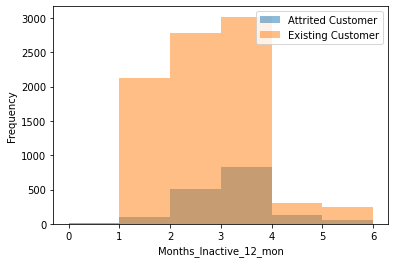

In [ ]:
plot_overlap_hist(df, 'Months_Inactive_12_mon', 'Attrition_Flag', 1)

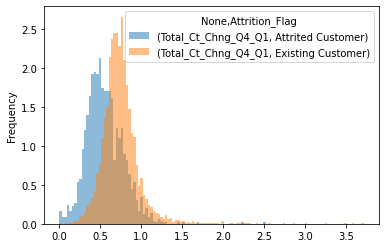

In [ ]:
bin_width=0.03
min_amt=df['Total_Ct_Chng_Q4_Q1'].min()
max_amt=df['Total_Ct_Chng_Q4_Q1'].max()
first_bin=min_amt//bin_width*bin_width
bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
df[['Attrition_Flag', 'Total_Ct_Chng_Q4_Q1']].pivot(columns='Attrition_Flag').plot(kind='hist', alpha=.5, bins=bins, density=True)
# plt.legend(['Attrited Customer', 'Existing Customer'])

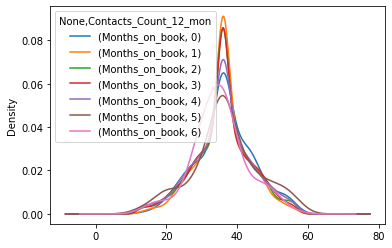

In [ ]:
bin_width=1
min_amt=df['Months_on_book'].min()
max_amt=df['Months_on_book'].max()
first_bin=min_amt//bin_width*bin_width
bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
df[['Contacts_Count_12_mon', 'Months_on_book']].pivot(columns='Contacts_Count_12_mon').plot(kind='kde')
# plt.legend(['Attrited Customer', 'Existing Customer'])

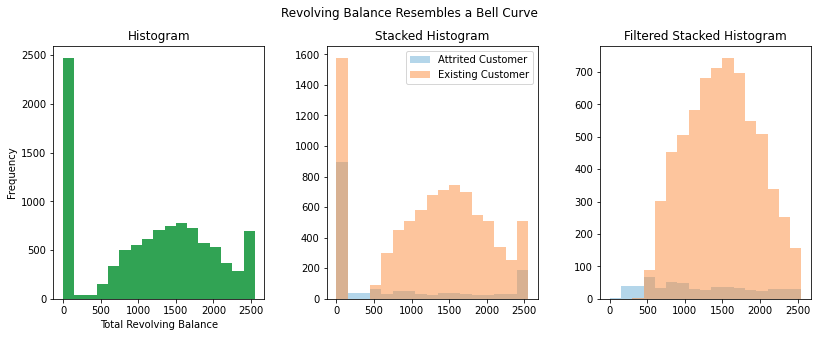

In [ ]:
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# total_rev_bal=df
min_bal=df['Total_Revolving_Bal'].min()
max_bal=df['Total_Revolving_Bal'].max()
bins=np.arange(math.floor(min_bal/150)*150, math.ceil(max_bal/150)*150+1, 150)
fig, ax=plt.subplots(1, 3, figsize=(12, 5), sharex=True)
colors=['cornflowerblue', 'darkorange']
cmap = plt.get_cmap("tab20c")
colors=[cmap(1), cmap(5)]
# for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
#     g['Total_Revolving_Bal'].plot(kind='hist', label=i, density=True, alpha=0.5, ax=ax[1])
#     # total_rev_bal.plot(kind='hist')
#     min_bal=g['Total_Revolving_Bal'].min()
#     max_bal=g['Total_Revolving_Bal'].max()
#     norm_x=np.arange(min_bal, max_bal, len(total_rev_bal)**.1)
#     ax[1].plot(norm_x, sts.norm.pdf(norm_x, loc=g['Total_Revolving_Bal'].mean(), scale=g['Total_Revolving_Bal'].std()), color=colors[idx])
# total_rev_bal['Total_Revolving_Bal'].plot(kind='hist', ax=ax[0], bins=bins, color=cmap(8))
df['Total_Revolving_Bal'].plot(kind='hist', ax=ax[0], bins=bins, color=cmap(8))
ax[0].set_xlabel('Total Revolving Balance')
ax[0].set_title('Histogram')
# for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
for idx, (i, g) in enumerate(df.groupby('Attrition_Flag')): 
#     print(np.histogram(g['Total_Revolving_Bal'].values, bins=bins))
    g['Total_Revolving_Bal'].plot(kind='hist', alpha=0.5, label=i, ax=ax[1], bins=bins, color=colors[idx]) 
ax[1].set_ylabel('')
ax[1].legend(loc='upper right')
ax[1].set_title('Stacked Histogram')
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# total_rev_bal=df
bin_width=150
min_amt=df['Total_Revolving_Bal'].min()
max_amt=df['Total_Revolving_Bal'].max()
first_bin=min_amt//bin_width*bin_width
bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
#     print(np.histogram(g['Total_Revolving_Bal'].values, bins=bins))
    g['Total_Revolving_Bal'].plot(kind='hist', alpha=0.5, label=i, ax=ax[2], bins=bins, color=colors[idx]) 

ax[2].set_title('Filtered Stacked Histogram')
ax[2].set_ylabel('')
fig.suptitle('Revolving Balance Resembles a Bell Curve')
fig.tight_layout(pad=3)

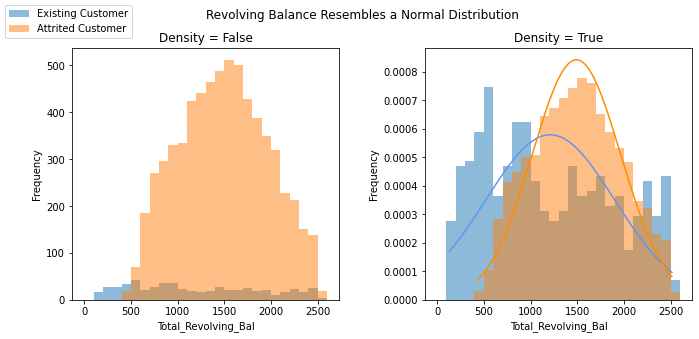

In [ ]:
total_rev_bal=df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
# total_rev_bal=df
min_bal=df['Total_Revolving_Bal'].min()
max_bal=df['Total_Revolving_Bal'].max()
bins=np.arange(math.floor(min_bal/100)*100, math.ceil(max_bal/100)*100+1, 100)
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
colors=['cornflowerblue', 'darkorange']


for idx, (i, g) in enumerate(total_rev_bal.groupby('Attrition_Flag')): 
    g['Total_Revolving_Bal'].plot(kind='hist', label=i, density=True, alpha=0.5, ax=ax[1], bins=bins)
    # total_rev_bal.plot(kind='hist')
    min_bal=g['Total_Revolving_Bal'].min()
    max_bal=g['Total_Revolving_Bal'].max()
    norm_x=np.arange(min_bal, max_bal, len(total_rev_bal)**.1)
    ax[1].plot(norm_x, sts.norm.pdf(norm_x, loc=g['Total_Revolving_Bal'].mean(), scale=g['Total_Revolving_Bal'].std()), color=colors[idx])

for i, g in total_rev_bal.groupby('Attrition_Flag'): 
    g['Total_Revolving_Bal'].plot(kind='hist', alpha=0.5, label=i, ax=ax[0], bins=bins) 

ax[0].set_title('Density = False')
ax[1].set_title('Density = True')
ax[0].set_xlabel('Total_Revolving_Bal')
ax[1].set_xlabel('Total_Revolving_Bal')
fig.legend(['Existing Customer', 'Attrited Customer'], loc='upper left')
fig.suptitle('Revolving Balance Resembles a Normal Distribution')
fig.tight_layout(pad=3)

# Density Plot

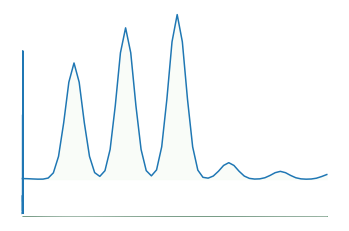

In [ ]:
from scipy.stats import gaussian_kde

# kde=gaussian_kde(df['Total_Trans_Ct'].values)
# x_axis=np.arange(df['Total_Trans_Ct'].values.min(), df['Total_Trans_Ct'].values.max())
# plt.plot(x_axis, kde(x_axis))
fig, ax=plt.subplots(2, 1)
plt.subplots_adjust(hspace=-.8)
for idx, each_cat in enumerate(df['Attrition_Flag'].unique()):
    data=df[df['Attrition_Flag']==each_cat]
    kde=gaussian_kde(data['Months_Inactive_12_mon'].values)
    x_axis=np.arange(data['Months_Inactive_12_mon'].values.min(), data['Months_Inactive_12_mon'].values.max(), 0.1)
#     ax[idx].set_alpha(0)
    ax[idx].axis('off')
    ax[idx].plot(x_axis, kde(x_axis))
    ax[idx].fill_between(x_axis, kde(x_axis),color=cmap(3), alpha=0.5)
    ax[idx].spines['top'].set_visible(False)

def plot_ridge(data, outer_col, inner_col, zoom): 
    from scipy.stats import gaussian_kde
    cmap=plt.get_cmap('Greens')
    categories=data[outer_col].unique()
    c_increment=256/len(categories)
    ticks=[]
    ridge_gap=1/np.exp(zoom)
    for idx, each_cat in enumerate(categories):
        values=data[data[outer_col]==each_cat][inner_col].values
        kde=gaussian_kde(values)
        x_axis=np.linspace(data[inner_col].values.min(), data[inner_col].values.max(), 100)
#         x_axis=np.arange(data[inner_col].values.min(), data[inner_col].values.max())
        y_upper=kde(x_axis)-ridge_gap*idx
        y_lower=-ridge_gap*idx
        plt.plot(x_axis, kde(x_axis)-ridge_gap*idx, color='w')
        plt.fill_between(x_axis, y_upper, y_lower, color=cmap(int((idx+1)*c_increment)))
        ticks.append(each_cat)
    tick_loc=[-ridge_gap*i for i in range(len(categories))]
    plt.yticks(tick_loc, ticks)
    plt.ylabel(outer_col)
    plt.xlabel(inner_col)

plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 8)

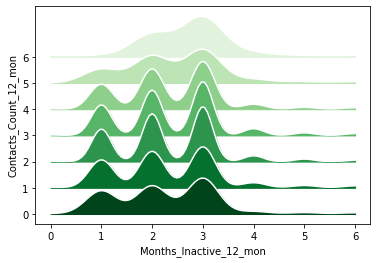

In [ ]:
plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 1)

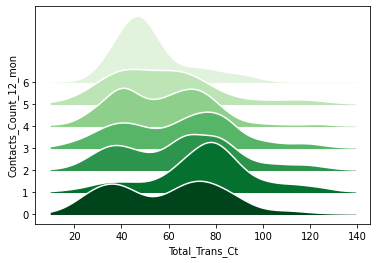

In [ ]:
plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Total_Trans_Ct', 4.5)

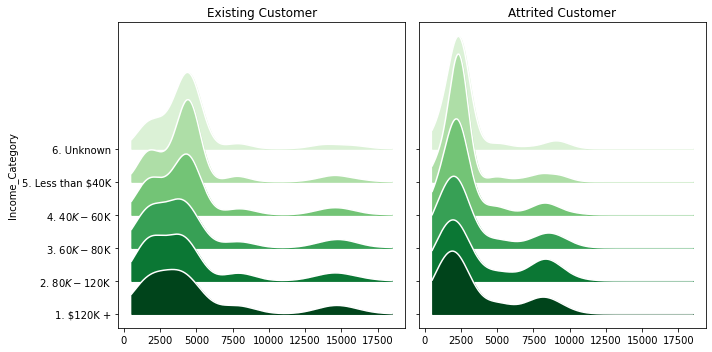

In [ ]:
cmap=plt.get_cmap('Greens')

from scipy.stats import gaussian_kde
outer_col='Income_Category'
inner_col='Total_Trans_Amt'
classes='Attrition_Flag'
fig, ax=plt.subplots(1, len(df[classes].unique()), figsize=(10, 5), sharey=True, sharex=True)
zoom=9
sorted_df=df.sort_values(by=[outer_col, classes], ascending=False)
x_axis=np.arange(df[inner_col].values.min(), df[inner_col].values.max(), 10)
categories=sorted_df[outer_col].unique()
c_increment=256/len(categories)
for j, each_group in enumerate(sorted_df[classes].unique()): 
    data=sorted_df[sorted_df[classes]==each_group]
    ticks=[]
    ridge_gap=1/np.exp(zoom)
    for idx, each_cat in enumerate(categories):
        values=data[data[outer_col]==each_cat][inner_col].values
        if len(values)>1: 
            kde=gaussian_kde(values)
            y_upper=kde(x_axis)-ridge_gap*idx
            y_lower=-ridge_gap*idx
            ax[j].plot(x_axis, kde(x_axis)-ridge_gap*idx, color='w')
            ax[j].fill_between(x_axis, y_upper, y_lower, color=cmap(int((idx+1)*c_increment)))
        ticks.append(each_cat)
    tick_loc=[-ridge_gap*i for i in range(len(categories))]
    ax[0].set_yticks(tick_loc)
    ax[0].set_yticklabels(ticks)
    ax[0].set_ylabel(outer_col)
#     ax[0].set_xlabel(inner_col)
    ax[j].set_title(each_group)
fig.tight_layout()

# Box Plot

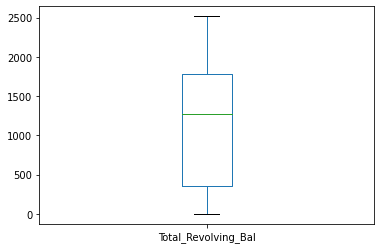

In [ ]:
df['Total_Revolving_Bal'].plot(kind='box', showfliers=False)

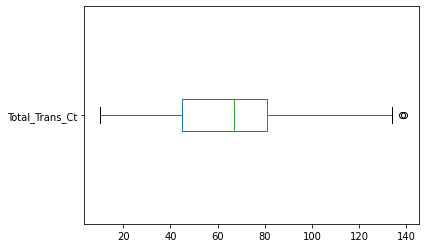

In [ ]:
df['Total_Trans_Ct'].plot(kind='box', vert=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


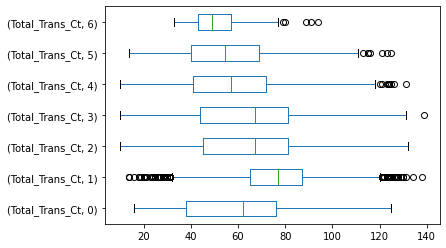

In [ ]:
df[['Contacts_Count_12_mon', 'Total_Trans_Ct']].sort_values('Contacts_Count_12_mon').pivot(columns='Contacts_Count_12_mon').plot(kind='box', vert=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


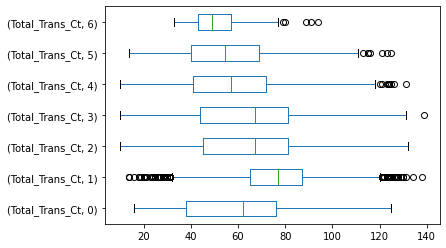

In [ ]:
df[['Contacts_Count_12_mon', 'Total_Trans_Ct']].pivot(columns='Contacts_Count_12_mon').plot(kind='box', vert=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


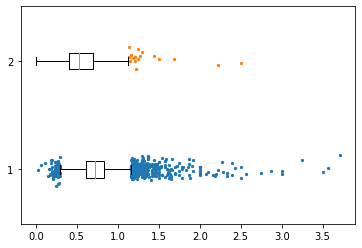

In [ ]:
def rand_jitter(arr):
    stdev = .1 * (max(arr) - min(arr))
    print(stdev)
    return arr + np.random.randn(len(arr)) * 0.03# * stdev
#     return arr+np.randrange(-1, 1)

box_lists=[]
size=5
for idx, each_cat in enumerate(df['Attrition_Flag'].unique()): 
    value_list=df[df['Attrition_Flag']==each_cat]['Total_Ct_Chng_Q4_Q1'].values
    q3=np.quantile(value_list, 0.75)
    q1=np.quantile(value_list, 0.25)
    IQR=q3-q1
    outlier_x=[]
    outlier_y=[]
    for each_value in value_list: 
        if (each_value>q3+1.5*IQR) | (each_value<q1-1.5*IQR): 
            outlier_x.append(each_value)
            outlier_y.append(idx+1)
    box_lists.append(value_list)
    jitter=outlier_y+np.random.randn(len(outlier_y))*size/100
    plt.scatter(outlier_x, jitter, s=size)
plt.boxplot(box_lists, showfliers=False, vert=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


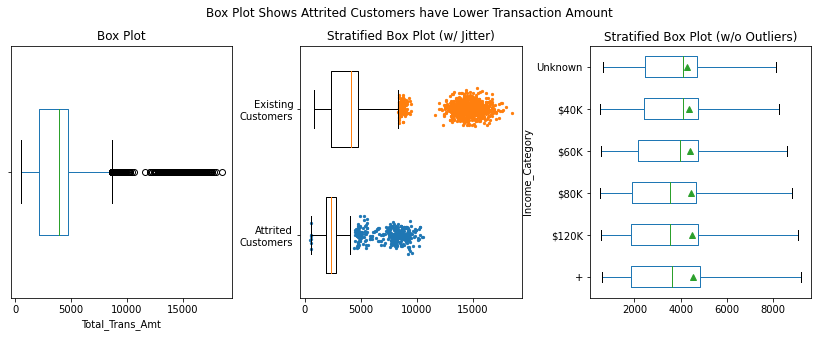

In [ ]:
fig, ax=plt.subplots(1, 3, figsize=(12, 5))#, sharex=True)
df['Total_Trans_Amt'].plot(kind='box', vert=False, ax=ax[0], widths=.5)
ax[0].set_yticklabels('')
ax[0].set_xlabel('Total_Trans_Amt')
ax[0].set_title('Box Plot')

box_lists=[]
size=5
for idx, each_cat in enumerate(sorted(df['Attrition_Flag'].unique())): 
    value_list=df[df['Attrition_Flag']==each_cat]['Total_Trans_Amt'].values
    q3=np.quantile(value_list, 0.75)
    q1=np.quantile(value_list, 0.25)
    IQR=q3-q1
    outlier_x=[]
    outlier_y=[]
    for each_value in value_list: 
        if (each_value>q3+1.5*IQR) | (each_value<q1-1.5*IQR): 
            outlier_x.append(each_value)
            outlier_y.append(idx+1)
    box_lists.append(value_list)
    jitter=outlier_y+np.random.randn(len(outlier_y))*size/100
    ax[1].scatter(outlier_x, jitter, s=size)
ax[1].boxplot(box_lists, showfliers=False, vert=False, widths=.6)
ax[1].set_yticklabels(['Attrited\nCustomers', 'Existing\nCustomers'])
ax[1].set_title('Stratified Box Plot (w/ Jitter)')

df[['Income_Category', 'Total_Trans_Amt']].sort_values('Income_Category', ascending=False).pivot(columns='Income_Category').plot(kind='box', vert=False, ax=ax[2], showmeans=True, showfliers=False)
ax[2].set_ylabel('Income_Category')
ax[2].set_yticklabels([x.split()[-1] for x in sorted(df['Income_Category'].unique())])
# ax[2].set_yticklabels([0, 1, 2, 3, 4, 5, 6])
ax[2].set_title('Stratified Box Plot (w/o Outliers)')
fig.suptitle('Box Plot Shows Attrited Customers have Lower Transaction Amount')
fig.tight_layout(pad=3, w_pad=0)